# Illustration: Black-Scholes-Merton Call/Put Option Pricing formula & Greeks

This jupyter notebook implements the Black-Scholes-Merton European call and put option formula from Theorem 15.2 and 15.3 (Lecture 16) and the "Greeks" (Lecture 17)

In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

Define the **call** option formulas:

In [2]:
def BSCall(s, tau, sigma, r, K):

        dplus = (np.log(s/K)+(r+0.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
        dminus = dplus - sigma*np.sqrt(tau)

        price = s*st.norm.cdf(dplus) - K*np.exp(-r*tau)*st.norm.cdf(dminus)
        
        delta = st.norm.cdf(dplus)
        gamma =  st.norm.pdf(dplus) * 1/(s * sigma * np.sqrt(tau))
        theta = s * sigma/(2*np.sqrt(tau)) * st.norm.pdf(dplus) + r * K * np.exp(-r*tau) * st.norm.cdf(dminus)
        rho = K * tau * np.exp(-r * tau) * st.norm.cdf(dminus)
        vega  = s * np.sqrt(tau) * st.norm.pdf(dplus)
        
        return price, delta, gamma, theta, rho, vega

Define the **put** option formulas:

In [3]:
def BSPut(s, tau, sigma, r, K):

        dplus = (np.log(s/K)+(r+0.5*sigma**2)*tau)/(sigma*np.sqrt(tau))
        dminus = dplus - sigma*np.sqrt(tau)

        price = K*np.exp(-r*tau)*st.norm.cdf(-dminus) - s*st.norm.cdf(-dplus)
        
        delta = -st.norm.cdf(-dplus)
        gamma =  st.norm.pdf(dplus) * 1/(s * sigma * np.sqrt(tau))
        theta = s * sigma/(2*np.sqrt(tau)) * st.norm.pdf(dplus) - r * K * np.exp(-r*tau) * st.norm.cdf(-dminus)
        rho = -K * tau * np.exp(-r * tau) * st.norm.cdf(-dminus)
        vega  = s * np.sqrt(tau) * st.norm.pdf(dplus)
        
        return price, delta, gamma, theta, rho, vega

Plot the **call** price for different maturities $T$ as a function of the current stock price $S_0$ (strike $K$ fixed):

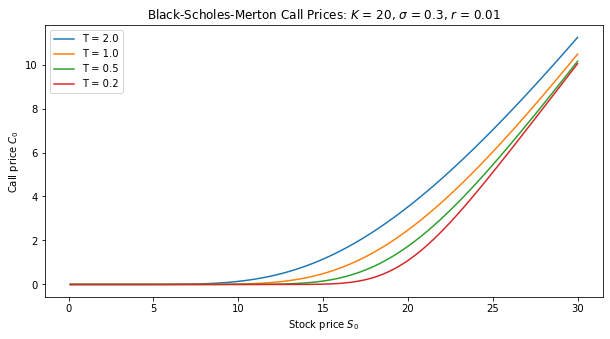

In [4]:
K = 20
sigma = 0.3
r = 0.01

maturities = np.array([2,1,.5,.2])


plt.figure(figsize=(10,5))

stockprices = np.linspace(0.1,30,100)

plt.plot(stockprices,BSCall(stockprices, maturities[0], sigma, r, K)[0])
plt.plot(stockprices,BSCall(stockprices, maturities[1], sigma, r, K)[0])
plt.plot(stockprices,BSCall(stockprices, maturities[2], sigma, r, K)[0])
plt.plot(stockprices,BSCall(stockprices, maturities[3], sigma, r, K)[0])

plt.title("Black-Scholes-Merton Call Prices: $K$ = {}, $\sigma$ = {}, $r$ = {}".format(K, sigma, r))
plt.xlabel("Stock price $S_0$")
plt.ylabel("Call price $C_0$")

plt.legend(["T = " + str(maturities[0]),
            "T = " + str(maturities[1]), 
            "T = " + str(maturities[2]),
            "T = " + str(maturities[3])])

plt.show()

Plot the **put** price for different maturities $T$ as a function of the current stock price $S_0$ (strike $K$ fixed):

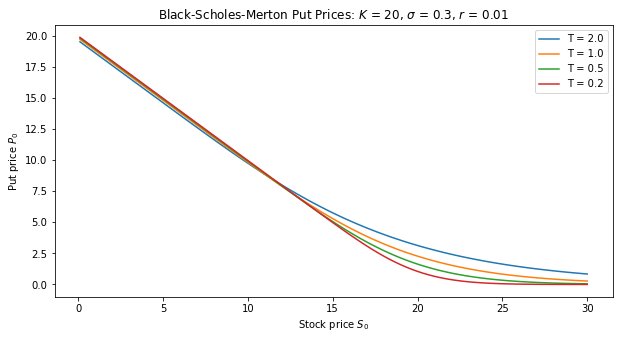

In [5]:
K = 20
sigma = 0.3
r = 0.01

maturities = np.array([2,1,.5,.2])

plt.figure(figsize=(10,5))

stockprices = np.linspace(0.1,30,100)

plt.plot(stockprices,BSPut(stockprices, maturities[0], sigma, r, K)[0])
plt.plot(stockprices,BSPut(stockprices, maturities[1], sigma, r, K)[0])
plt.plot(stockprices,BSPut(stockprices, maturities[2], sigma, r, K)[0])
plt.plot(stockprices,BSPut(stockprices, maturities[3], sigma, r, K)[0])

plt.title("Black-Scholes-Merton Put Prices: $K$ = {}, $\sigma$ = {}, $r$ = {}".format(K, sigma, r))
plt.xlabel("Stock price $S_0$")
plt.ylabel("Put price $P_0$")

plt.legend(["T = " + str(maturities[0]),
            "T = " + str(maturities[1]), 
            "T = " + str(maturities[2]),
            "T = " + str(maturities[3])])

plt.show()

Plot the **call option's** delta $\Delta$ as a function of the current stock price $S_0$ (strike $K$ and maturity $T$ fixed):

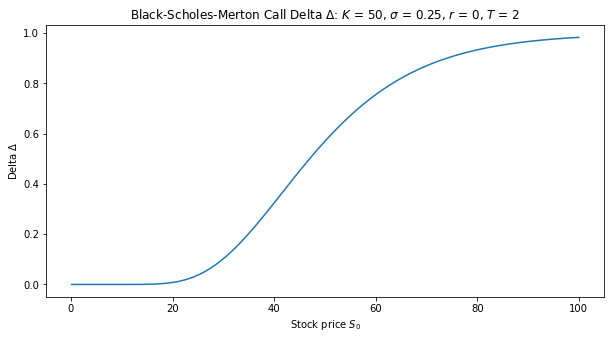

In [6]:
K = 50
sigma = 0.25
r = 0
T = 2

plt.figure(figsize=(10,5))

stockprices = np.linspace(0.1,100,100)

plt.plot(stockprices,BSCall(stockprices, T, sigma, r, K)[1])

plt.title("Black-Scholes-Merton Call Delta $\Delta$:" + 
          " $K$ = {}, $\sigma$ = {}, $r$ = {}, $T$ = {}".format(K, sigma, r , T))
plt.xlabel("Stock price $S_0$")
plt.ylabel("Delta $\Delta$")

plt.show()

Plot the **put option's** delta $\Delta$ as a function of the current stock price $S_0$ (strike $K$ and maturity $T$ fixed):

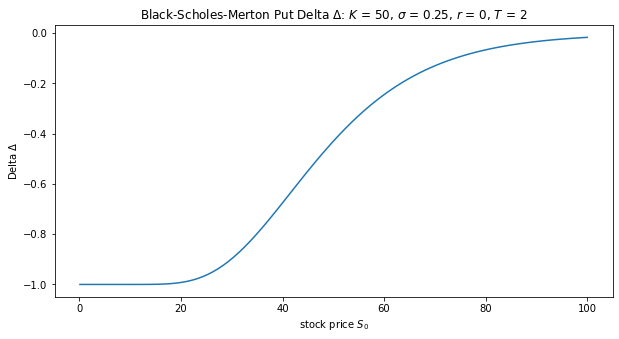

In [7]:
K = 50
sigma = 0.25
r = 0
T = 2

plt.figure(figsize=(10,5))

stockprices = np.linspace(0.1,100,100)

plt.plot(stockprices, BSPut(stockprices, T, sigma, r, K)[1])

plt.title("Black-Scholes-Merton Put Delta $\Delta$:" + 
          " $K$ = {}, $\sigma$ = {}, $r$ = {}, $T$ = {}".format(K, sigma, r , T))
plt.xlabel("stock price $S_0$")
plt.ylabel("Delta $\Delta$")

plt.show()

Typical patters for the variation of a call option's delta $\Delta$ with time to maturity (with stock price $S_0$ fixed):

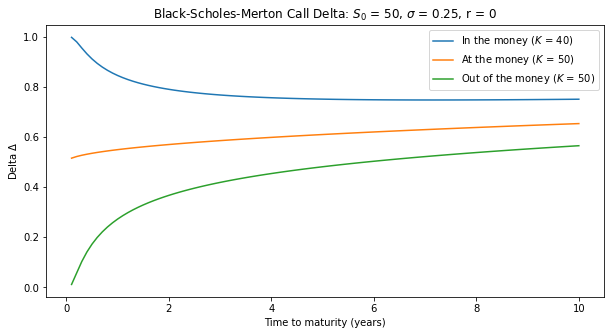

In [8]:
S0 = 50
sigma = 0.25
r = 0

strikes = np.array([40,50,60])

timeToMaturity = np.linspace(0.1,10,100)

plt.figure(figsize=(10,5))

plt.plot(timeToMaturity, BSCall(S0, timeToMaturity, sigma, r, strikes[0])[1])
plt.plot(timeToMaturity, BSCall(S0, timeToMaturity, sigma, r, strikes[1])[1])
plt.plot(timeToMaturity, BSCall(S0, timeToMaturity, sigma, r, strikes[2])[1])

plt.title("Black-Scholes-Merton Call Delta: $S_0$ = {}, $\sigma$ = {}, r = {}".format(S0, sigma, r))
plt.xlabel("Time to maturity (years)")
plt.ylabel("Delta $\Delta$")

plt.legend(["In the money ($K$ = " + str(strikes[0]) + ")",
            "At the money ($K$ = " + str(strikes[1]) + ")", 
            "Out of the money ($K$ = " + str(strikes[1]) + ")"])

plt.show()

Plot the $\Gamma$ as a function of the current stock price $S_0$ (strike $K$ and maturity $T$ fixed):

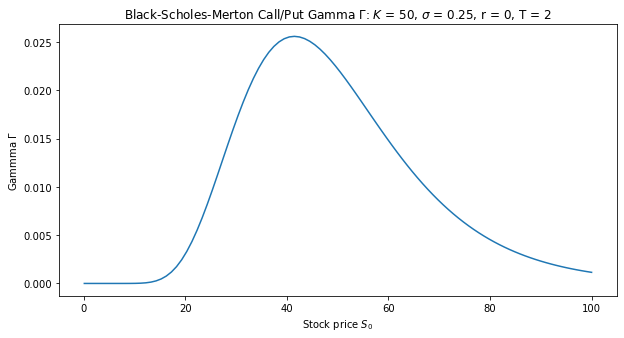

In [9]:
K = 50
sigma = 0.25
r = 0

plt.figure(figsize=(10,5))

stockprices = np.linspace(0.1,100,100)

plt.plot(stockprices,BSCall(stockprices, T, sigma, r, K)[2])

plt.title("Black-Scholes-Merton Call/Put Gamma $\Gamma$: $K$ = {}, $\sigma$ = {}, r = {}, T = {}".format(K, sigma, r , T))
plt.xlabel("Stock price $S_0$")
plt.ylabel("Gammma $\Gamma$")

plt.show()

Variation of gamma with time to maturity for a call/put option:

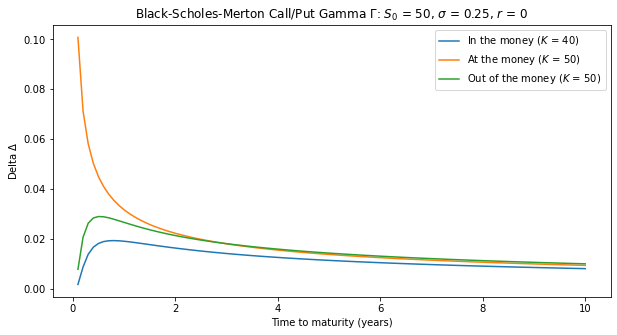

In [10]:
K = 50
sigma = 0.25
r = 0

strikes = np.array([40,50,60])

timeToMaturity = np.linspace(0.1,10,100)

plt.figure(figsize=(10,5))

plt.plot(timeToMaturity, BSCall(S0, timeToMaturity, sigma, r, strikes[0])[2])
plt.plot(timeToMaturity, BSCall(S0, timeToMaturity, sigma, r, strikes[1])[2])
plt.plot(timeToMaturity, BSCall(S0, timeToMaturity, sigma, r, strikes[2])[2])

plt.title("Black-Scholes-Merton Call/Put Gamma $\Gamma$: $S_0$ = {}, $\sigma$ = {}, $r$ = {}".format(S0, sigma, r))
plt.xlabel("Time to maturity (years)")
plt.ylabel("Delta $\Delta$")

plt.legend(["In the money ($K$ = " + str(strikes[0]) + ")",
            "At the money ($K$ = " + str(strikes[1]) + ")", 
            "Out of the money ($K$ = " + str(strikes[1]) + ")"])

plt.show()

Plot effect of changes in volatility $\sigma$ on call option price:

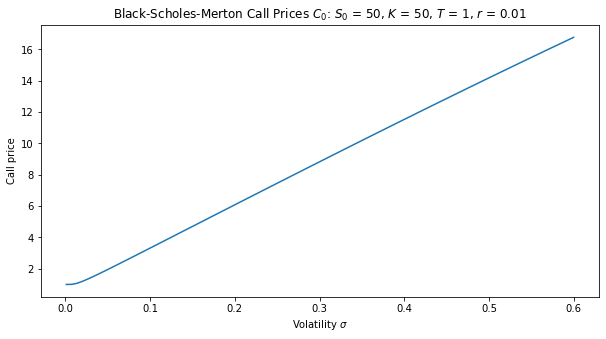

In [11]:
K = 50
S0 = 50
r = 0.01
T = 1

plt.figure(figsize=(10,5))

sigmas = np.linspace(0.001,0.6,100)

plt.plot(sigmas,BSCall(S0, maturities[0], sigmas, r, K)[0])

plt.title("Black-Scholes-Merton Call Prices $C_0$: $S_0$ = {}, $K$ = {}, $T$ = {}, $r$ = {}".format(S0, K, T, r))
plt.xlabel("Volatility $\sigma$")
plt.ylabel("Call price")

plt.show()

Variation of vega $\mathcal{V}$ with stock price for a call/put (strike $K$ fixed):

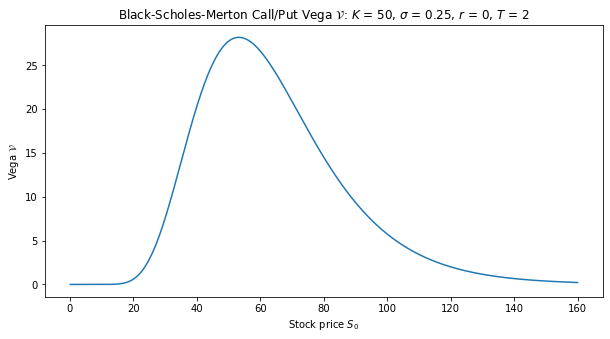

In [12]:
K = 50
sigma = 0.25
r = 0
T = 2

plt.figure(figsize=(10,5))

stockprices = np.linspace(0.1,160,1000)

plt.plot(stockprices,BSCall(stockprices, T, sigma, r, K)[5])

plt.title("Black-Scholes-Merton Call/Put Vega $\mathcal{V}$:" + 
          " $K$ = {}, $\sigma$ = {}, $r$ = {}, $T$ = {}".format(K, sigma, r , T))
plt.xlabel("Stock price $S_0$")
plt.ylabel("Vega $\mathcal{V}$")

plt.show()

Plot effect of changes in time-to-matirity $\tau=T$ on call option price:

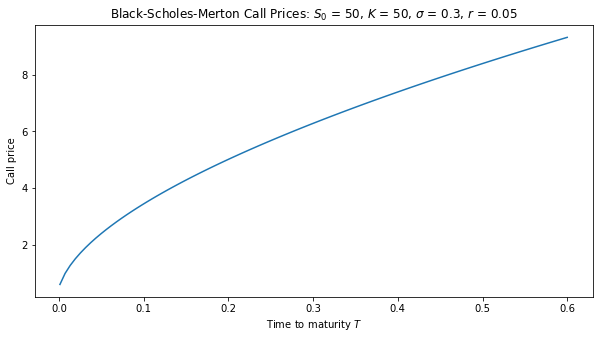

In [13]:
K = 50
S0 = 50
r = 0.05
sigma = 0.3

plt.figure(figsize=(10,5))

maturities = np.linspace(0.01,1.6,100)

plt.plot(sigmas,BSCall(S0, maturities, sigma, r, K)[0])

plt.title("Black-Scholes-Merton Call Prices:" + 
          " $S_0$ = {}, $K$ = {}, $\sigma$ = {}, $r$ = {}".format(S0,K, sigma, r))
plt.xlabel("Time to maturity $T$")
plt.ylabel("Call price")

plt.show()